<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

node degree clustering
0 6 0.13333333333333333
1 13 0.1282051282051282
2 12 0.09090909090909091
3 10 0.06666666666666667
4 11 0.12727272727272726
5 14 0.13186813186813187
6 14 0.14285714285714285
7 12 0.12121212121212122
8 13 0.0641025641025641
9 13 0.1282051282051282
10 12 0.12121212121212122
11 19 0.10526315789473684
12 16 0.1
13 13 0.08974358974358974
14 10 0.13333333333333333
15 12 0.10606060606060606
16 11 0.10909090909090909
17 12 0.13636363636363635
18 6 0
19 6 0.13333333333333333
20 16 0.08333333333333333
21 6 0.06666666666666667
22 8 0
23 7 0.09523809523809523
24 11 0.07272727272727272
25 11 0.2
26 12 0.06060606060606061
27 9 0.1388888888888889
28 6 0.2
29 12 0.15151515151515152
30 8 0.07142857142857142
31 10 0.2222222222222222
32 7 0.19047619047619047
33 8 0.07142857142857142
34 11 0.07272727272727272
35 15 0.19047619047619047
36 10 0.17777777777777778
37 15 0.10476190476190476
38 8 0.14285714285714285
39 10 0.13333333333333333
40 11 0.09090909090909091
41 11 0.14545454545454

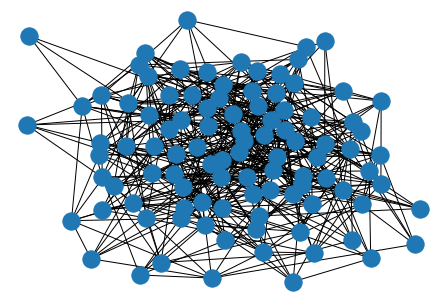

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 100  # 100 nodes
K = 200  # 200 agents
#M = 300  # 300 edges

#Graph = nx.gnm_random_graph(N, M)

P = 0.1 #Probabibilty for Node Connection in random graph
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.

# some network properties
print("node degree clustering")
for v in nx.nodes(Graph):
    print(f"{v} {nx.degree(Graph, v)} {nx.clustering(Graph, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(Graph):
    print(line)

nx.draw(Graph)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
print(Adjacency_matrix[0])

[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Node]
Node = {}
print(Node)
for i in range(N):
  Node[i] = list()
print(Node)


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: [], 50: [], 51: [], 52: [], 53: [], 54: [], 55: [], 56: [], 57: [], 58: [], 59: [], 60: [], 61: [], 62: [], 63: [], 64: [], 65: [], 66: [], 67: [], 68: [], 69: [], 70: [], 71: [], 72: [], 73: [], 74: [], 75: [], 76: [], 77: [], 78: [], 79: [], 80: [], 81: [], 82: [], 83: [], 84: [], 85: [], 86: [], 87: [], 88: [], 89: [], 90: [], 91: [], 92: [], 93: [], 94: [], 95: [], 96: [], 97: [], 98: [], 99: []}


In [4]:
#Adding Virus_presence Randomly
for i in range(N):
  Virus_presence=random.uniform(0,1)
  Node[i].append(Virus_presence)
print(Node)

{0: [0.1621544939618682], 1: [0.4087303414074265], 2: [0.9748871661927251], 3: [0.9045781201387889], 4: [0.0028010025484926926], 5: [0.05807960048156113], 6: [0.5794496338535734], 7: [0.5502372329464454], 8: [0.18521447277790715], 9: [0.7829971925474597], 10: [0.28850308863917307], 11: [0.32430089862831546], 12: [0.3591465807228933], 13: [0.651646331231579], 14: [0.7513697140118963], 15: [0.7453384710181845], 16: [0.4276466700448852], 17: [0.6362207401457985], 18: [0.2580398584735337], 19: [0.22071591887457398], 20: [0.7186667899010388], 21: [0.5727648968126725], 22: [0.6175132394889762], 23: [0.45699706992101197], 24: [0.05159843413492837], 25: [0.6148475958591267], 26: [0.04387798534502407], 27: [0.8182034339038485], 28: [0.9129914129818094], 29: [0.0017633977181278349], 30: [0.03199614821197194], 31: [0.7711506305253568], 32: [0.3163737276647215], 33: [0.08145532073132133], 34: [0.2339846638005284], 35: [0.7049100994755951], 36: [0.15735156874928746], 37: [0.3487556227664994], 38: [

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
for k in range(K):
  rand_node=random.randint(0,N-1)
  rand_state=random.randint(0,2)
  Node[rand_node].append(rand_state)
print(Node)

{0: [0.1621544939618682, 2], 1: [0.4087303414074265], 2: [0.9748871661927251, 2, 2, 1], 3: [0.9045781201387889], 4: [0.0028010025484926926, 2], 5: [0.05807960048156113, 1, 2], 6: [0.5794496338535734, 0, 0, 2], 7: [0.5502372329464454, 1, 0, 1], 8: [0.18521447277790715, 0, 0], 9: [0.7829971925474597, 2, 2], 10: [0.28850308863917307, 2, 0, 1, 0], 11: [0.32430089862831546, 1, 2], 12: [0.3591465807228933, 0, 2], 13: [0.651646331231579, 0, 2, 0, 1, 2, 2], 14: [0.7513697140118963], 15: [0.7453384710181845, 1, 0, 0, 2, 0, 1, 0], 16: [0.4276466700448852, 2, 0], 17: [0.6362207401457985, 2, 0], 18: [0.2580398584735337, 0, 2], 19: [0.22071591887457398, 2, 1], 20: [0.7186667899010388, 2], 21: [0.5727648968126725, 1], 22: [0.6175132394889762, 0, 1, 1, 2], 23: [0.45699706992101197, 1, 0], 24: [0.05159843413492837], 25: [0.6148475958591267, 2, 2, 0, 1], 26: [0.04387798534502407, 2, 0, 1, 0], 27: [0.8182034339038485], 28: [0.9129914129818094, 0, 0, 1, 2], 29: [0.0017633977181278349, 1], 30: [0.03199614

In [6]:
#Random Walk Implementation
def random_walk(Graph=Graph, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Node)):
      Node_next[i] = list() 
    for i in range(len(Node)):
      Node_next[i].append(Node[i][0])
    for i in range(len(Node)):
        for agent in list(range(1,len(Node[i]))):
          for walk in range(num_walks):
              curr_walk = [i]
              curr = i
              for step in range(num_steps):
                  neighbors = list(Graph.neighbors(curr))
                  neighbors.append(curr) #including no movement case
                  possible_moves=neighbors 
                  if len(possible_moves) > 0:
                      next = random.choice(possible_moves)
          Node_next[next].append(Node[curr][agent])
          curr_walk.append(next)
          #print(curr_walk)
          walks.append(next)
    return Node,Node_next

In [7]:
Node_n=Node.copy() 
for i in range(10):
  Node_p,Node_n = random_walk(Graph,Node_n,1,1) 
  #count=0
  #for i in range(len(Node_p)):
  #  count+=len(Node_p[i]) - 1
  #print(count)
  print(Node_p)
  print(Node_n)


{0: [0.1621544939618682, 2], 1: [0.4087303414074265], 2: [0.9748871661927251, 2, 2, 1], 3: [0.9045781201387889], 4: [0.0028010025484926926, 2], 5: [0.05807960048156113, 1, 2], 6: [0.5794496338535734, 0, 0, 2], 7: [0.5502372329464454, 1, 0, 1], 8: [0.18521447277790715, 0, 0], 9: [0.7829971925474597, 2, 2], 10: [0.28850308863917307, 2, 0, 1, 0], 11: [0.32430089862831546, 1, 2], 12: [0.3591465807228933, 0, 2], 13: [0.651646331231579, 0, 2, 0, 1, 2, 2], 14: [0.7513697140118963], 15: [0.7453384710181845, 1, 0, 0, 2, 0, 1, 0], 16: [0.4276466700448852, 2, 0], 17: [0.6362207401457985, 2, 0], 18: [0.2580398584735337, 0, 2], 19: [0.22071591887457398, 2, 1], 20: [0.7186667899010388, 2], 21: [0.5727648968126725, 1], 22: [0.6175132394889762, 0, 1, 1, 2], 23: [0.45699706992101197, 1, 0], 24: [0.05159843413492837], 25: [0.6148475958591267, 2, 2, 0, 1], 26: [0.04387798534502407, 2, 0, 1, 0], 27: [0.8182034339038485], 28: [0.9129914129818094, 0, 0, 1, 2], 29: [0.0017633977181278349, 1], 30: [0.03199614